In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

%matplotlib inline




In [2]:
df = pd.read_csv('vibration_ml_data(utf8).csv')

In [9]:
df

,dt,min_v,max_v,mean_v,median_v,mode_V,var_v,std_v,range_v,Q1,Q3,IQR,LB,UB,RMS,Label
0,2020-11-25 14:09:51,-0.026132,0.021607,-2.367838e-07,0.000189,-0.026132,0.000046,0.006768,0.047738,-0.004572,0.004710,0.009282,-0.018496,0.018633,0.006768,정상
1,2020-11-25 14:09:57,-0.026030,0.024427,1.975752e-05,0.000052,-0.026030,0.000046,0.006775,0.050457,-0.004589,0.004816,0.009405,-0.018696,0.018923,0.006775,정상
2,2020-11-25 14:10:06,-0.024434,0.023554,1.652153e-05,0.000091,0.007556,0.000045,0.006673,0.047987,-0.004512,0.004640,0.009152,-0.018240,0.018367,0.006673,정상
3,2020-11-25 14:11:54,-0.024242,0.023190,5.114369e-06,0.000012,-0.000639,0.000045,0.006723,0.047433,-0.004551,0.004630,0.009181,-0.018323,0.018402,0.006723,정상
4,2020-11-25 14:12:03,-0.023572,0.023039,1.224982e-05,0.000065,-0.008676,0.000046,0.006787,0.046611,-0.004551,0.004679,0.009230,-0.018395,0.018524,0.006787,정상
5,2020-11-25 14:12:06,-0.026953,0.023858,-6.725349e-06,0.000011,0.001440,0.000046,0.006782,0.050811,-0.004610,0.004708,0.009318,-0.018588,0.018686,0.006782,정상
6,2020-11-25 14:12:18,-0.025922,0.023740,-1.567703e-05,0.000057,0.005326,0.000046,0.006761,0.049662,-0.004527,0.004540,0.009067,-0.018128,0.018140,0.006761,정상
7,2020-11-25 14:12:36,-0.027274,0.023689,6.340273e-08,0.000044,-0.004420,0.000046,0.006795,0.050963,-0.004567,0.004704,0.009271,-0.018474,0.018611,0.006795,정상
8,2020-11-25 14:12:42,-0.029571,0.023227,-1.548085e-05,0.000028,-0.002871,0.000046,0.006751,0.052798,-0.004612,0.004595,0.009207,-0.018422,0.018405,0.006751,정상
9,2020-11-25 14:12:51,-0.028437,0.022503,-1.234513e-05,0.000022,-0.004022,0.000046,0.006760,0.050940,-0.004611,0.004620,0.009231,-0.018458,0.018467,0.006760,정상


In [40]:
df

,dt,min_v,max_v,mean_v,median_v,mode_V,var_v,std_v,range_v,Q1,Q3,IQR,LB,UB,RMS,Label
0,2020-11-25 14:09:51,-0.026132,0.021607,-2.367838e-07,0.000189,-0.026132,0.000046,0.006768,0.047738,-0.004572,0.004710,0.009282,-0.018496,0.018633,0.006768,정상
1,2020-11-25 14:09:57,-0.026030,0.024427,1.975752e-05,0.000052,-0.026030,0.000046,0.006775,0.050457,-0.004589,0.004816,0.009405,-0.018696,0.018923,0.006775,정상
2,2020-11-25 14:10:06,-0.024434,0.023554,1.652153e-05,0.000091,0.007556,0.000045,0.006673,0.047987,-0.004512,0.004640,0.009152,-0.018240,0.018367,0.006673,정상
3,2020-11-25 14:11:54,-0.024242,0.023190,5.114369e-06,0.000012,-0.000639,0.000045,0.006723,0.047433,-0.004551,0.004630,0.009181,-0.018323,0.018402,0.006723,정상
4,2020-11-25 14:12:03,-0.023572,0.023039,1.224982e-05,0.000065,-0.008676,0.000046,0.006787,0.046611,-0.004551,0.004679,0.009230,-0.018395,0.018524,0.006787,정상
5,2020-11-25 14:12:06,-0.026953,0.023858,-6.725349e-06,0.000011,0.001440,0.000046,0.006782,0.050811,-0.004610,0.004708,0.009318,-0.018588,0.018686,0.006782,정상
6,2020-11-25 14:12:18,-0.025922,0.023740,-1.567703e-05,0.000057,0.005326,0.000046,0.006761,0.049662,-0.004527,0.004540,0.009067,-0.018128,0.018140,0.006761,정상
7,2020-11-25 14:12:36,-0.027274,0.023689,6.340273e-08,0.000044,-0.004420,0.000046,0.006795,0.050963,-0.004567,0.004704,0.009271,-0.018474,0.018611,0.006795,정상
8,2020-11-25 14:12:42,-0.029571,0.023227,-1.548085e-05,0.000028,-0.002871,0.000046,0.006751,0.052798,-0.004612,0.004595,0.009207,-0.018422,0.018405,0.006751,정상
9,2020-11-25 14:12:51,-0.028437,0.022503,-1.234513e-05,0.000022,-0.004022,0.000046,0.006760,0.050940,-0.004611,0.004620,0.009231,-0.018458,0.018467,0.006760,정상


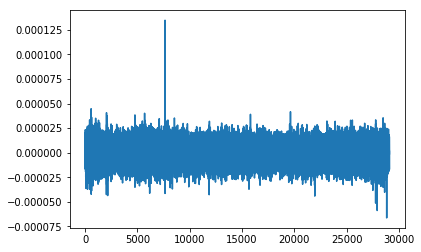

In [10]:
plt.plot(df['mean_v'])

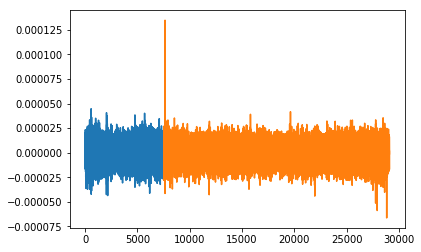

In [13]:
plt.plot(df[df['Label']=='정상']['mean_v'] )
plt.plot(df[df['Label']=='베어링불량']['mean_v'] )

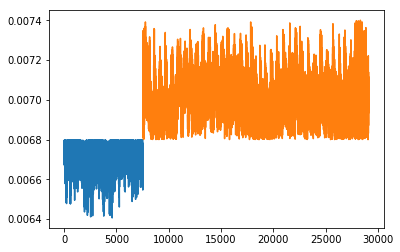

In [14]:
plt.plot(df[df['Label']=='정상']['RMS'] )
plt.plot(df[df['Label']=='베어링불량']['RMS'] )

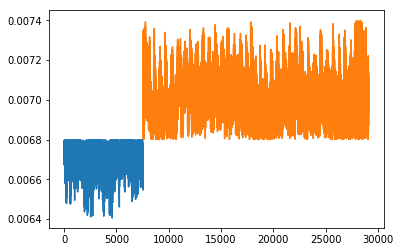

In [15]:
plt.plot(df[df['Label']=='정상']['std_v'] )
plt.plot(df[df['Label']=='베어링불량']['std_v'] )

In [3]:
variables = ['dt', 'min_v', 'max_v', 'mean_v', 'median_v', 'mode_V', 'var_v',
       'std_v', 'range_v', 'Q1', 'Q3', 'IQR', 'LB', 'UB', 'RMS', 'Label']
corr_df = df[variables].corr()
corr_df.style.background_gradient(cmap = 'RdYlGn_r')

,min_v,max_v,mean_v,median_v,mode_V,var_v,std_v,range_v,Q1,Q3,IQR,LB,UB,RMS
min_v,1,-0.115591,0.00880771,0.0152781,0.0330389,-0.229405,-0.229338,-0.721677,0.146307,-0.157806,-0.157629,0.155697,-0.158831,-0.229339
max_v,-0.115591,1,0.0117495,-0.134535,-0.00567017,0.329153,0.329422,0.771009,-0.247233,0.194116,0.229789,-0.23594,0.222436,0.329421
mean_v,0.00880771,0.0117495,1,0.200574,-0.00304515,-0.00178519,-0.00167619,0.00254143,0.085114,0.0806337,-0.00476346,0.0260202,0.0168417,-0.00168063
median_v,0.0152781,-0.134535,0.200574,1,0.00612967,-0.15964,-0.159972,-0.103552,0.19205,-0.0413626,-0.12333,0.142311,-0.103464,-0.159972
mode_V,0.0330389,-0.00567017,-0.00304515,0.00612967,1,-0.000675902,-0.000799181,-0.0251335,0.00288725,0.00031669,-0.00138096,0.00178812,-0.000960898,-0.000799591
var_v,-0.229405,0.329153,-0.00178519,-0.15964,-0.000675902,1,0.999898,0.376464,-0.885641,0.8611,0.906712,-0.907234,0.901807,0.999898
std_v,-0.229338,0.329422,-0.00167619,-0.159972,-0.000799181,0.999898,1,0.376608,-0.885711,0.861097,0.906747,-0.907278,0.901833,1
range_v,-0.721677,0.771009,0.00254143,-0.103552,-0.0251335,0.376464,0.376608,1,-0.266097,0.236453,0.2612,-0.264247,0.256845,0.376608
Q1,0.146307,-0.247233,0.085114,0.19205,0.00288725,-0.885641,-0.885711,-0.266097,1,-0.856981,-0.965657,0.981212,-0.945204,-0.885711
Q3,-0.157806,0.194116,0.0806337,-0.0413626,0.00031669,0.8611,0.861097,0.236453,-0.856981,1,0.961448,-0.940308,0.978273,0.861096


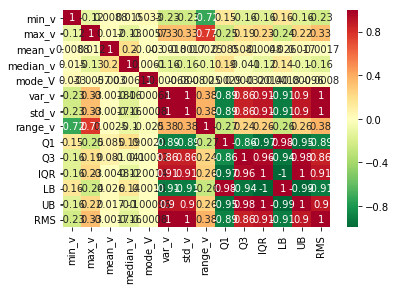

In [23]:
import seaborn as sns
sns.heatmap(corr_df, annot = True, cmap = 'RdYlGn_r')

{'whiskers': [<matplotlib.lines.Line2D at 0x1cea5744b38>,
 'caps': [<matplotlib.lines.Line2D at 0x1cea5744f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cea57447b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1cea5750898>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cea5750be0>],
 'means': []}

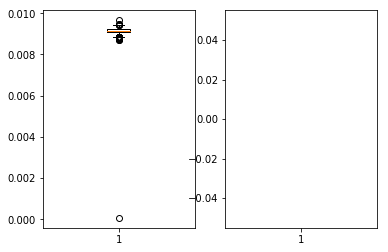

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(df[df['Label'] == '정상']['IQR'])
ax2.boxplot(df[df['Label'] == '베어링 불량']['IQR'])

In [34]:
df = df[df['IQR']>0.008]
ax3 = fig.add_subplot(1,2,1)
ax4 = fig.add_subplot(1,2,2)

ax3.boxplot(df[df['Label'] == '정상']['IQR'])
ax4.boxplot(df[df['Label'] == '베어링불량']['IQR'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


{'whiskers': [<matplotlib.lines.Line2D at 0x1cea462ccf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cea43dc9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cea5c25da0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cea43f5080>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cea43f56a0>],
 'means': []}

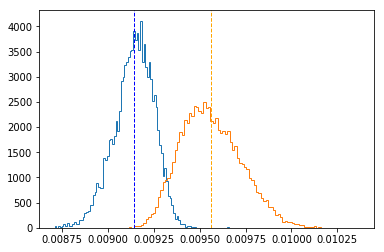

In [37]:
plt.hist(df[df['Label'] == '정상']['IQR'],bins =100,density = True, histtype = 'step',linewidth = 1)
plt.hist(df[df['Label'] == '베어링불량']['IQR'],bins =100,density = True, histtype = 'step',linewidth = 1)

plt.axvline(x = np.mean(df[df['Label'] == '정상']['IQR']), color='blue',linestyle='--',linewidth = 1)
plt.axvline(x = np.mean(df[df['Label'] == '베어링불량']['IQR']), color='orange',linestyle='--',linewidth = 1)

In [4]:
ttest_ind = stats.ttest_ind(df[df['Label'] == '정상']['IQR'],df[df['Label'] == '베어링불량']['IQR'],equal_var = True)
ttest_ind

Ttest_indResult(statistic=-184.01774036958685, pvalue=0.0)

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Label'])
df['Label_le'] = le.transform(df['Label'])


In [6]:
del df['dt'],df['Label']

In [7]:
df


,min_v,max_v,mean_v,median_v,mode_V,var_v,std_v,range_v,Q1,Q3,IQR,LB,UB,RMS,Label_le
0,-0.026132,0.021607,-2.367838e-07,0.000189,-0.026132,0.000046,0.006768,0.047738,-0.004572,0.004710,0.009282,-0.018496,0.018633,0.006768,1
1,-0.026030,0.024427,1.975752e-05,0.000052,-0.026030,0.000046,0.006775,0.050457,-0.004589,0.004816,0.009405,-0.018696,0.018923,0.006775,1
2,-0.024434,0.023554,1.652153e-05,0.000091,0.007556,0.000045,0.006673,0.047987,-0.004512,0.004640,0.009152,-0.018240,0.018367,0.006673,1
3,-0.024242,0.023190,5.114369e-06,0.000012,-0.000639,0.000045,0.006723,0.047433,-0.004551,0.004630,0.009181,-0.018323,0.018402,0.006723,1
4,-0.023572,0.023039,1.224982e-05,0.000065,-0.008676,0.000046,0.006787,0.046611,-0.004551,0.004679,0.009230,-0.018395,0.018524,0.006787,1
5,-0.026953,0.023858,-6.725349e-06,0.000011,0.001440,0.000046,0.006782,0.050811,-0.004610,0.004708,0.009318,-0.018588,0.018686,0.006782,1
6,-0.025922,0.023740,-1.567703e-05,0.000057,0.005326,0.000046,0.006761,0.049662,-0.004527,0.004540,0.009067,-0.018128,0.018140,0.006761,1
7,-0.027274,0.023689,6.340273e-08,0.000044,-0.004420,0.000046,0.006795,0.050963,-0.004567,0.004704,0.009271,-0.018474,0.018611,0.006795,1
8,-0.029571,0.023227,-1.548085e-05,0.000028,-0.002871,0.000046,0.006751,0.052798,-0.004612,0.004595,0.009207,-0.018422,0.018405,0.006751,1
9,-0.028437,0.022503,-1.234513e-05,0.000022,-0.004022,0.000046,0.006760,0.050940,-0.004611,0.004620,0.009231,-0.018458,0.018467,0.006760,1


In [8]:
label_df = df['Label_le']
feature_df = df.drop('Label_le',axis = 1)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df,label_df,test_size = 0.2,random_state=11)

In [62]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl


In [11]:
from imblearn.over_sampling import SMOTE

sm =SMOTE(random_state = 11)
X_resampled, y_resampled = sm.fit_resample(X_train,list(y_train))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
lr_clf = lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

print(accuracy_score(y_test,lr_pred))

0.7303196974905466


In [24]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(lr_clf,X_resampled, y_resampled,cv=10)
for iter_count,accuracy in enumerate(score):
    print(['{0}번째 교차 검증 정확도:{1:.4f}'.format(iter_count,accuracy)])
    
print("평균 예측 정확도: {0:.4f}".format(np.mean(score)))
    

['0번째 교차 검증 정확도:0.6938']
['1번째 교차 검증 정확도:0.6953']
['2번째 교차 검증 정확도:0.6823']
['3번째 교차 검증 정확도:0.6814']
['4번째 교차 검증 정확도:0.6762']
['5번째 교차 검증 정확도:0.6964']
['6번째 교차 검증 정확도:0.6674']
['7번째 교차 검증 정확도:0.6862']
['8번째 교차 검증 정확도:0.6969']
['9번째 교차 검증 정확도:0.6888']
평균 예측 정확도: 0.6865


In [31]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test, pred, labels=[1,0])
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall= recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    print('Confusion Matrix\n', confusion)
    print('정확도 : {0:4f}, 정밀도 : {0:4f}, 재현율 : {0:4f}, F1-score : {0:4f}'.format(accuracy,precision,recall,f1))

    
get_clf_eval(y_test,lr_pred)

Confusion Matrix
 [[   0 1569]
 [   0 4249]]
정확도 : 0.730320, 정밀도 : 0.730320, 재현율 : 0.730320, F1-score : 0.730320


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


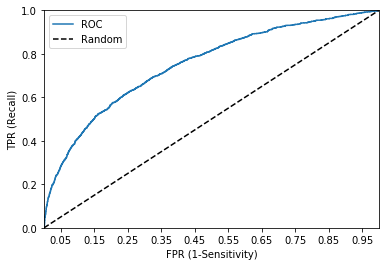

In [35]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test,pred):
    fprs, tprs, thresholds = roc_curve(y_test, pred)
    plt.plot(fprs,tprs,label = 'ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR (1-Sensitivity)')
    plt.ylabel('TPR (Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])


In [37]:
label_df = df[['Label_le','IQR','RMS']]
feature_df = df.drop('Label_le',axis = 1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(feature_df,label_df,test_size = 0.2,random_state=11)

In [41]:
sm1 =SMOTE(random_state = 11)
X_resampled, y_resampled = sm1.fit_resample(X_train,list(y_train))

ValueError: Found input variables with inconsistent numbers of samples: [23272, 3]

In [42]:
lr_clf = LogisticRegression()
lr_clf = lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

print(accuracy_score(y_test,lr_pred))

ValueError: y should be a 1d array, got an array of shape (23272, 3) instead.

In [44]:
lr_clf = LogisticRegression()
lr_clf = lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

print(accuracy_score(y_test,lr_pred))

ValueError: y should be a 1d array, got an array of shape (23272, 3) instead.

In [ ]:
score= cross_val_score(lr_clf,X_resampled, y_resampled,cv=10)
for iter_count,accuracy in enumerate(score):
    print(['{0}번째 교차 검증 정확도:{1:.4f}'.format(iter_count,accuracy)])
    
print("평균 예측 정확도: {0:.4f}".format(np.mean(score)))
    